<a href="https://colab.research.google.com/github/ldselvera/logging_python/blob/main/logging_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction 

Logging is one of the most useful tools in a programmer's toolbox. It’s used as an aid to better understand the flow of a program and identify scenarios that may not have been considered while the program was being developed.

Python provides us with a built-in logging module called `logging`. We will cover important concepts that will allow you to begin adding logging to your applications.

Each logging function is named after an event's severity level — this makes it possible to record the most urgent events in your program.

The defined levels, in order of increasing severity, are as follows:
* **DEBUG**: *Used to record low-level details with regards to the source code, for example, notifying the developers that a function has been called or the value of an object stored in a variable.*
* **INFO**: *Used for general purpose information regarding things occurring in a program such as a file being read or an email being sent.*
* **WARNING**: *Used as a warning to inform you there's no error yet but there may be errors in the future.*
* **ERROR**: *Used for errors that are preventable.*
* **CRITICAL**: *Used for errors that cause the system to fail or cannot be recovered.*

In [2]:
import logging 

In [3]:
logging.debug("debug message")

In [4]:
logging.info("info message")

In [5]:
logging.warning("warning message")

In [6]:
logging.error("error message")

ERROR:root:error message


In [7]:
logging.critical("critical message")

CRITICAL:root:critical message


1. The `logging.debug()` and `logging.info()` functions are not logged. This is because the default configuration is to only log messages with a severity level of `WARNING` or above.

2. The output format of the logged messages is `severity_level:logger_name:logging_message`.

# Configuring logger

we can set up our logger by configuring it with `logging.basicConfig()`.

The most commonly used parameters of logging.basicConfig() include:

* `filename` — Specifies a `FileHandler` is created using the specified `filename` instead of a `StreamHandler`; The logging output is sent to a disk file with the given `filename`.
* `filemode` — If a `filename` is specified then the file will be opened in the given `filemode`. The default mode is ‘a’: learn more about the different modes.
* `format` — The specified format string will be used for the handler; The default format string is `levelname:name:message`.
* `level` — The specified severity level the root logger should be set to.

In [8]:
import logging
from datetime import date

In [9]:
logging.basicConfig(level=logging.INFO)

In [10]:
def calculate_age(year_of_birth:int) -> int:
    """Compute the age of a person"""
    current_year = date.today().year
    return current_year - year_of_birth

In [11]:
year_of_birth = 1994
logging.info(f"User was born in {year_of_birth} and is approximately {calculate_age(year_of_birth)} years old")

If we wanted to send our log message to a file instead of the console, we must pass the argument `filename` to our `logging.basicConfig()` and provide a name that we’d like to save the file under.

**Note**: *`basicConfig()` can only be called only if the root logger has not already been configured — it can only be called once. Thus, imagine the next few code snippets are updating the script above rather than extending it.*

In [12]:
logging.basicConfig(level=logging.INFO, filename="example.log") 

Performing this update to our code will now append all the subsequent log messages to the file named `example.log` in your current working directory — this means if the file already exists then the logger would simply add your new logs to the end of the file.

You can change this behavior by setting the `filemode`. By default, the `filemode` parameter is set to `"a"` which means the file is “*open for writing, appending to the end of file if it exists*”. Let’s change the `filemode` to `"w"`: “*open for writing, truncating the file first.*”

In [13]:
logging.basicConfig(level=logging.INFO, 
                    filename="example.log",
                    filemode="w")

Each time the program is run, the log file will be rewritten because of the change we made to the `filemode`.

At the moment, the log message being stored is from the default formating — `levelname:name:message`. We can change this by setting the `format` parameter in our default config.

The `logging` module also provides several shorthand elements that can easily be added to the output format. For example, we can use `%(asctime)s` to output a human-readable time of when the `LogRecord` is created.

In [14]:
logging.basicConfig(level=logging.INFO, 
                    filename="example.log",
                    format="%(asctime)s - %(message)s")

logging.info(f"User was born in {year_of_birth} and is approximately {calculate_age(year_of_birth)} years old")

# Creating logger object

The `logging` documentation advises us to create our own logger object of the `Logger` class — this is even more important when there are multiple modules in your application.

loggers should NEVER be instantiated directly, but always through the module-level function `logging.getLogger(name)`. Multiple calls to `getLogger()` with the same name will always return a reference to the same Logger object.

In [15]:
import logging

_logger = logging.getLogger(__name__)

The name of the python file is `predict.py`: thus, we have instantiated a custom logger in the `_logger` variable called `predict`.

It is recommended that we use module-level loggers by passing `__name__` as the name parameter to `getLogger()` to create a logger object as the name of the logger itself would tell us from where the events are being logged. `__name__` is a special built-in variable in Python which evaluates to the name of the current module.

# When to use logging

The logging documentation provides us with a [useful guide](https://docs.python.org/3/howto/logging.html#:~:text=Task%20you%20want,and%20application%20domain). 


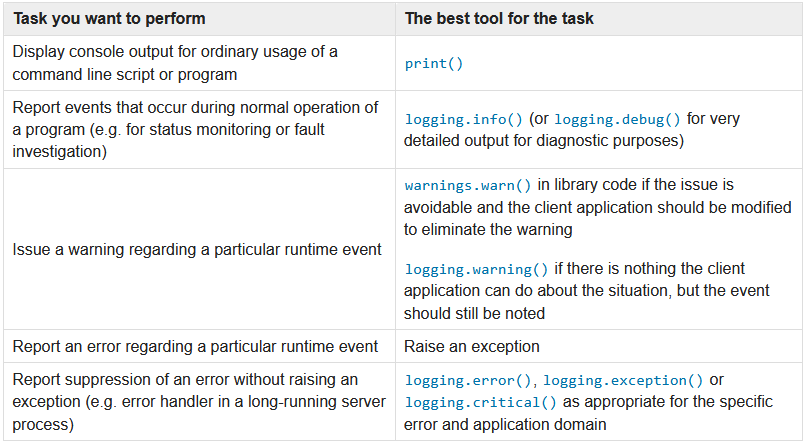